# A TS-Impute Usage Example

In [20]:
from warnings import filterwarnings
filterwarnings('ignore')
import matplotlib.pyplot as plt
import math
import pandas as pd

# Import the TS-Impute library
import imputation as tsi

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Configutation

In [21]:
# Random Gap Generator
max_gap_length = 40
max_gap_count = 3

# CLustering
no_clusters = 1

# Smoothing
window = 15
order = 1

my_file = 'path/to/input/file'
pixel = '[3435,34]'

print('Reading file: ', my_file)

Reading file:  /mnt/data/jupyter_notebooks/gchatzi/STELAR/VISTA/MissingValuesImputation/Data/30TYQ/ground_truth_top_fields_all_year_SMALL.csv


### A plotting unction

In [22]:
def create_plot(pixel, x, data_all, data_gaps):
    fig, ax = plt.subplots(figsize=(24, 16))
    plt.xticks(rotation=25)
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams.update({'font.size': 24})

    # Add red columns for missing values
    count = 0
    for index in data_gaps[pixel].index:
        if math.isnan(data_gaps[pixel][index]):
            ax.axvspan(data_gaps[pixel].index[count-1], data_gaps[pixel].index[count+1], facecolor='y', alpha=1)
        count += 1

    tmp = pd.concat([x[pixel], data_all[pixel]], axis=1)

    # Set column names
    col_names = ['TS-Impute', 'Original']
    tmp.columns = col_names

    # Change colors
    colors = ['#d62728', '#9068BC']

    # Plot tmp on the existing plot
    tmp.plot(ax=ax, figsize=(24, 16), linewidth=4, legend=True, color=colors)

    ax.set_xlabel('Date')
    ax.set_ylabel('LAI Value')

    # Legend top right
    ax.legend(loc='upper right', bbox_to_anchor=(1.0, 1.0))   

    plt.gcf().autofmt_xdate()

### Read the Data

In [23]:
data = pd.read_csv(my_file)
data.head()

,row,col,20200106,20200116,20200119,20200203,20200205,20200208,20200215,20200218,...,20221116,20221201,20221204,20221206,20221211,20221216,20221221,20221224,20221226,20221231
0,1419,396,602.0,551.0,521.0,511.0,678.0,NaN,649.0,693.0,...,NaN,860.0,1099.0,NaN,763.0,556.0,NaN,NaN,NaN,NaN
1,3028,5858,520.0,489.0,489.0,729.0,639.0,NaN,634.0,NaN,...,697.0,750.0,NaN,763.0,658.0,968.0,555.0,NaN,NaN,NaN
2,3848,5469,NaN,675.0,622.0,503.0,845.0,NaN,905.0,408.0,...,1252.0,771.0,NaN,NaN,803.0,1032.0,968.0,NaN,NaN,NaN
3,3818,5520,NaN,742.0,769.0,734.0,782.0,NaN,876.0,679.0,...,761.0,697.0,NaN,NaN,774.0,NaN,729.0,NaN,NaN,NaN
4,3799,5570,NaN,1017.0,993.0,946.0,1509.0,NaN,1500.0,NaN,...,770.0,843.0,434.0,NaN,1711.0,NaN,858.0,NaN,NaN,NaN


### Do Some Preprocessing

In [24]:
data = data.loc[:,~data.columns.duplicated()] 
data['row_col'] = '[' + data['row'].astype(str) + ',' + data['col'].astype(str) + ']'
data.set_index('row_col', inplace=True)
data.drop(['row', 'col'], axis=1, inplace=True)
data.columns = pd.to_datetime(data.columns, format='%Y%m%d') 
data = data / 1000
data = data.T
data.columns.name = None
data.index.names = ['date']
data.index = pd.to_datetime(data.index, format='%y%m%d')
data = data.interpolate(method='linear', axis=1)
data.dropna(inplace=True, axis=1)

data.head()

,"[3013,146]","[3436,17]","[3435,34]","[2958,147]","[3121,6122]","[3518,4488]","[2760,29]","[3030,5870]","[3035,5936]","[3549,4476]",...,"[908,354]","[3097,209]","[3132,225]","[3932,5748]","[3461,4424]","[3794,5639]","[3738,5614]","[3726,5589]","[3605,4332]","[3685,5604]"
date,,,,,,,,,,,,,,,,,,,,,
2020-01-06,0.702,0.968,0.905,0.342,0.380,0.418,0.456,0.326,0.696,0.6512,...,1.447,1.173,0.321,0.321,0.321,0.321,0.321,0.321,0.321,0.321
2020-01-16,0.634,0.905,0.905,0.278,0.540,0.610,0.399,0.365,0.634,0.3640,...,0.653,0.883,0.390,0.903,0.236,0.405,1.091,0.000,0.589,0.081
2020-01-19,0.602,0.905,0.845,0.311,0.557,0.649,0.429,0.321,0.679,0.4030,...,0.769,1.022,0.249,0.944,0.299,0.456,1.148,0.022,0.645,0.102
2020-02-03,0.611,0.730,0.748,0.347,0.550,0.841,0.341,0.467,0.677,0.5150,...,0.735,1.225,0.380,1.315,0.350,0.387,1.184,0.078,0.647,0.027
2020-02-05,0.718,1.007,0.968,0.311,0.645,0.898,0.438,0.472,0.742,0.5320,...,0.902,1.214,0.556,1.800,0.321,0.568,1.849,0.050,0.722,0.067


### Apply Normalization

In [25]:
data = tsi.z_normalize(data)
data.head()

,"[3013,146]","[3436,17]","[3435,34]","[2958,147]","[3121,6122]","[3518,4488]","[2760,29]","[3030,5870]","[3035,5936]","[3549,4476]",...,"[908,354]","[3097,209]","[3132,225]","[3932,5748]","[3461,4424]","[3794,5639]","[3738,5614]","[3726,5589]","[3605,4332]","[3685,5604]"
date,,,,,,,,,,,,,,,,,,,,,
2020-01-06,-0.337492,-0.801352,-0.869123,-0.283724,-1.168582,-0.865877,-0.824146,-0.641322,-0.035352,-0.056937,...,1.131238,0.222262,-0.498395,-0.665188,-0.629523,-0.523579,-0.945758,-0.411728,-0.743094,0.383571
2020-01-16,-0.422492,-0.852497,-0.869123,-0.360132,-1.029072,-0.545455,-0.910080,-0.546648,-0.192064,-0.711312,...,-0.445719,-0.285933,-0.369320,-0.247253,-0.790495,-0.378722,0.200284,-0.967074,0.047555,-0.297656
2020-01-19,-0.462492,-0.852497,-0.926766,-0.320734,-1.014249,-0.480369,-0.864852,-0.653460,-0.078321,-0.622452,...,-0.215332,-0.042350,-0.633082,-0.217811,-0.671187,-0.290773,0.285121,-0.929013,0.212765,-0.238049
2020-02-03,-0.451242,-0.994569,-1.019954,-0.277755,-1.020353,-0.159947,-0.997520,-0.299040,-0.083376,-0.367264,...,-0.282860,0.313386,-0.388026,0.048605,-0.574603,-0.409763,0.338702,-0.832131,0.218665,-0.450932
2020-02-05,-0.317492,-0.769690,-0.808599,-0.320734,-0.937519,-0.064822,-0.851283,-0.286902,0.080919,-0.328530,...,0.048818,0.294110,-0.058791,0.396884,-0.629523,-0.097631,1.328466,-0.880572,0.439929,-0.337394


### Apply Smoothing

In [26]:
## Apply smoothing ##
data = tsi.smooth_data(data, window, order)
data.head()

,"[3013,146]","[3436,17]","[3435,34]","[2958,147]","[3121,6122]","[3518,4488]","[2760,29]","[3030,5870]","[3035,5936]","[3549,4476]",...,"[908,354]","[3097,209]","[3132,225]","[3932,5748]","[3461,4424]","[3794,5639]","[3738,5614]","[3726,5589]","[3605,4332]","[3685,5604]"
date,,,,,,,,,,,,,,,,,,,,,
2020-01-06,-0.582265,-0.985513,-1.066117,-0.234923,-1.142841,-0.380376,-0.997062,-0.425066,0.065625,-0.265978,...,0.038320,-0.201972,-0.406834,-0.370470,-0.534139,-0.220910,-0.462266,-0.623691,0.335136,0.152995
2020-01-16,-0.518670,-0.950774,-1.019908,-0.236928,-1.097133,-0.378145,-0.949155,-0.388277,0.090241,-0.266043,...,0.047440,-0.132292,-0.385873,-0.248727,-0.530609,-0.243171,-0.213991,-0.610589,0.281985,0.137870
2020-01-19,-0.455074,-0.916035,-0.973700,-0.238933,-1.051425,-0.375915,-0.901247,-0.351489,0.114857,-0.266107,...,0.056559,-0.062612,-0.364911,-0.126985,-0.527078,-0.265433,0.034285,-0.597487,0.228835,0.122745
2020-02-03,-0.391478,-0.881296,-0.927491,-0.240938,-1.005717,-0.373684,-0.853340,-0.314701,0.139473,-0.266172,...,0.065679,0.007068,-0.343950,-0.005242,-0.523548,-0.287694,0.282560,-0.584385,0.175684,0.107620
2020-02-05,-0.327883,-0.846557,-0.881283,-0.242943,-0.960010,-0.371453,-0.805432,-0.277913,0.164089,-0.266236,...,0.074799,0.076747,-0.322989,0.116500,-0.520017,-0.309955,0.530836,-0.571283,0.122533,0.092495


### Add Custom Missing Values and Plot

In [27]:
data_gaps = tsi.generate_custom_gaps(data, max_gap_length, max_gap_count, type='random')
data_gaps.head()

,"[3013,146]","[3436,17]","[3435,34]","[2958,147]","[3121,6122]","[3518,4488]","[2760,29]","[3030,5870]","[3035,5936]","[3549,4476]",...,"[908,354]","[3097,209]","[3132,225]","[3932,5748]","[3461,4424]","[3794,5639]","[3738,5614]","[3726,5589]","[3605,4332]","[3685,5604]"
date,,,,,,,,,,,,,,,,,,,,,
2020-01-06,-0.582265,-0.985513,-1.066117,-0.234923,-1.142841,-0.380376,-0.997062,-0.425066,0.065625,-0.265978,...,0.038320,-0.201972,-0.406834,-0.370470,-0.534139,-0.220910,-0.462266,-0.623691,0.335136,0.152995
2020-01-16,-0.518670,-0.950774,-1.019908,-0.236928,-1.097133,-0.378145,-0.949155,-0.388277,0.090241,-0.266043,...,0.047440,-0.132292,-0.385873,-0.248727,-0.530609,-0.243171,-0.213991,-0.610589,NaN,0.137870
2020-01-19,-0.455074,-0.916035,-0.973700,-0.238933,-1.051425,-0.375915,-0.901247,-0.351489,0.114857,-0.266107,...,0.056559,-0.062612,-0.364911,-0.126985,-0.527078,-0.265433,0.034285,-0.597487,NaN,0.122745
2020-02-03,-0.391478,NaN,-0.927491,-0.240938,-1.005717,-0.373684,-0.853340,-0.314701,0.139473,-0.266172,...,0.065679,0.007068,-0.343950,-0.005242,-0.523548,-0.287694,0.282560,-0.584385,0.175684,0.107620
2020-02-05,-0.327883,NaN,-0.881283,-0.242943,-0.960010,-0.371453,-0.805432,-0.277913,0.164089,-0.266236,...,0.074799,0.076747,-0.322989,0.116500,-0.520017,-0.309955,0.530836,-0.571283,0.122533,0.092495


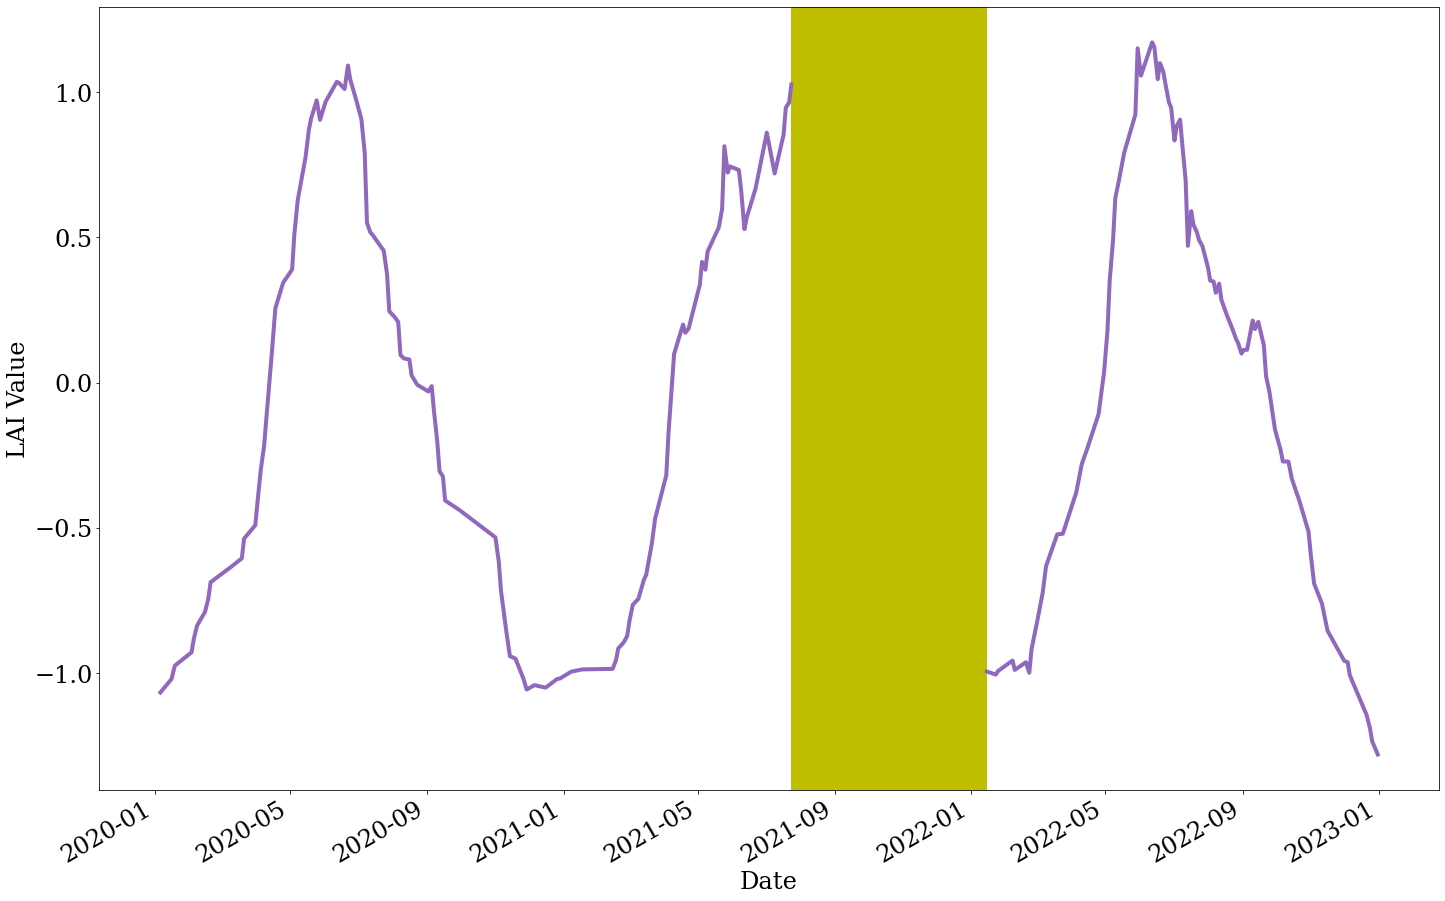

In [28]:
fig, ax = plt.subplots(figsize=(24, 16))
plt.xticks(rotation=25)
plt.rcParams['font.family'] = 'serif'
plt.rcParams.update({'font.size': 24})

# Add red columns for missing values
count = 0
for index in data_gaps[pixel].index:
    if math.isnan(data_gaps[pixel][index]):
        ax.axvspan(data_gaps[pixel].index[count-1], data_gaps[pixel].index[count+1], facecolor='y', alpha=1)
    count += 1

data_gaps[pixel].plot(figsize=(24, 16), linewidth=4, legend=False, color='#9068BC')

ax.set_xlabel('Date')
ax.set_ylabel('LAI Value')

plt.gcf().autofmt_xdate()

### Apply k-Means Clustering
This is optional. If no clustering is required, set **no_clusters** to 1.

In [29]:
data = tsi.run_clustering(data, no_clusters)
data.head()

date,2020-01-06 00:00:00,2020-01-16 00:00:00,2020-01-19 00:00:00,2020-02-03 00:00:00,2020-02-05 00:00:00,2020-02-08 00:00:00,2020-02-15 00:00:00,2020-02-18 00:00:00,2020-02-20 00:00:00,2020-03-09 00:00:00,...,2022-12-01 00:00:00,2022-12-04 00:00:00,2022-12-06 00:00:00,2022-12-11 00:00:00,2022-12-16 00:00:00,2022-12-21 00:00:00,2022-12-24 00:00:00,2022-12-26 00:00:00,2022-12-31 00:00:00,cluster
"[3013,146]",-0.582265,-0.518670,-0.455074,-0.391478,-0.327883,-0.264287,-0.200691,-0.137096,-0.012188,0.034895,...,-0.279032,-0.266264,-0.292826,-0.319388,-0.345949,-0.372511,-0.399073,-0.425634,-0.452196,0
"[3436,17]",-0.985513,-0.950774,-0.916035,-0.881296,-0.846557,-0.811818,-0.777079,-0.742340,-0.670465,-0.623270,...,-0.859941,-0.866692,-0.916828,-0.966965,-1.017101,-1.067237,-1.117373,-1.167509,-1.217645,0
"[3435,34]",-1.066117,-1.019908,-0.973700,-0.927491,-0.881283,-0.835075,-0.788866,-0.742658,-0.686617,-0.634674,...,-0.957161,-0.961498,-1.006917,-1.052337,-1.097757,-1.143176,-1.188596,-1.234016,-1.279435,0
"[2958,147]",-0.234923,-0.236928,-0.238933,-0.240938,-0.242943,-0.244948,-0.246953,-0.248959,-0.175576,-0.181466,...,-0.189498,-0.168063,-0.206175,-0.244287,-0.282400,-0.320512,-0.358624,-0.396736,-0.434849,0
"[3121,6122]",-1.142841,-1.097133,-1.051425,-1.005717,-0.960010,-0.914302,-0.868594,-0.822886,-0.801494,-0.752317,...,-0.794463,-0.788600,-0.832283,-0.875965,-0.919648,-0.963330,-1.007013,-1.050695,-1.094378,0


### Train the Meta-Model

In [30]:
algorithms = ['ROSL', 'CDMissingValueRecovery', 'OGDImpute',
                'MeanImpute', 'LinearImpute', 'DynaMMo', 'GROUSE', 'SVT']

params = {"truncation": 3, "rank": 5, "reg": 0.6, "eps": 0.6, "max_rank": 3, "single_block": False,
                "tauScale": 0.7, "k0": 1, "w": 3, "lambda": 0.3, "H": 5, "max_iter": 100, "fast": True
}

# Since we already smoothed and normalized the data, we will not apply the same during training
model, metrics = tsi.train_meta_model(data=data, no_clusters=no_clusters, smooth=False, window=-1, order=-1, normalize=False, algorithms=algorithms, params=params, gap_type='random', gap_length=max_gap_length, gap_count=max_gap_count)
model


Running for cluster: 0


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=2, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=200, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=1, ...)

In [31]:
print("Mean absolute error: ", round(metrics['mae'], 3))
print("Root mean squared error: ", round(metrics['rmse'], 3))

Mean absolute error:  0.023
Root mean squared error:  0.069


### Apply Imputation on the Initial Data Using the Meta-Model

In [32]:
## Apply imputation ##
pred_ms_ts = tsi.run_imputation(data_gaps, algorithms, params)
y_pred = model.predict(pred_ms_ts)
x = tsi.fill_missing_with_lm(data_gaps, y_pred)

### Plot Result

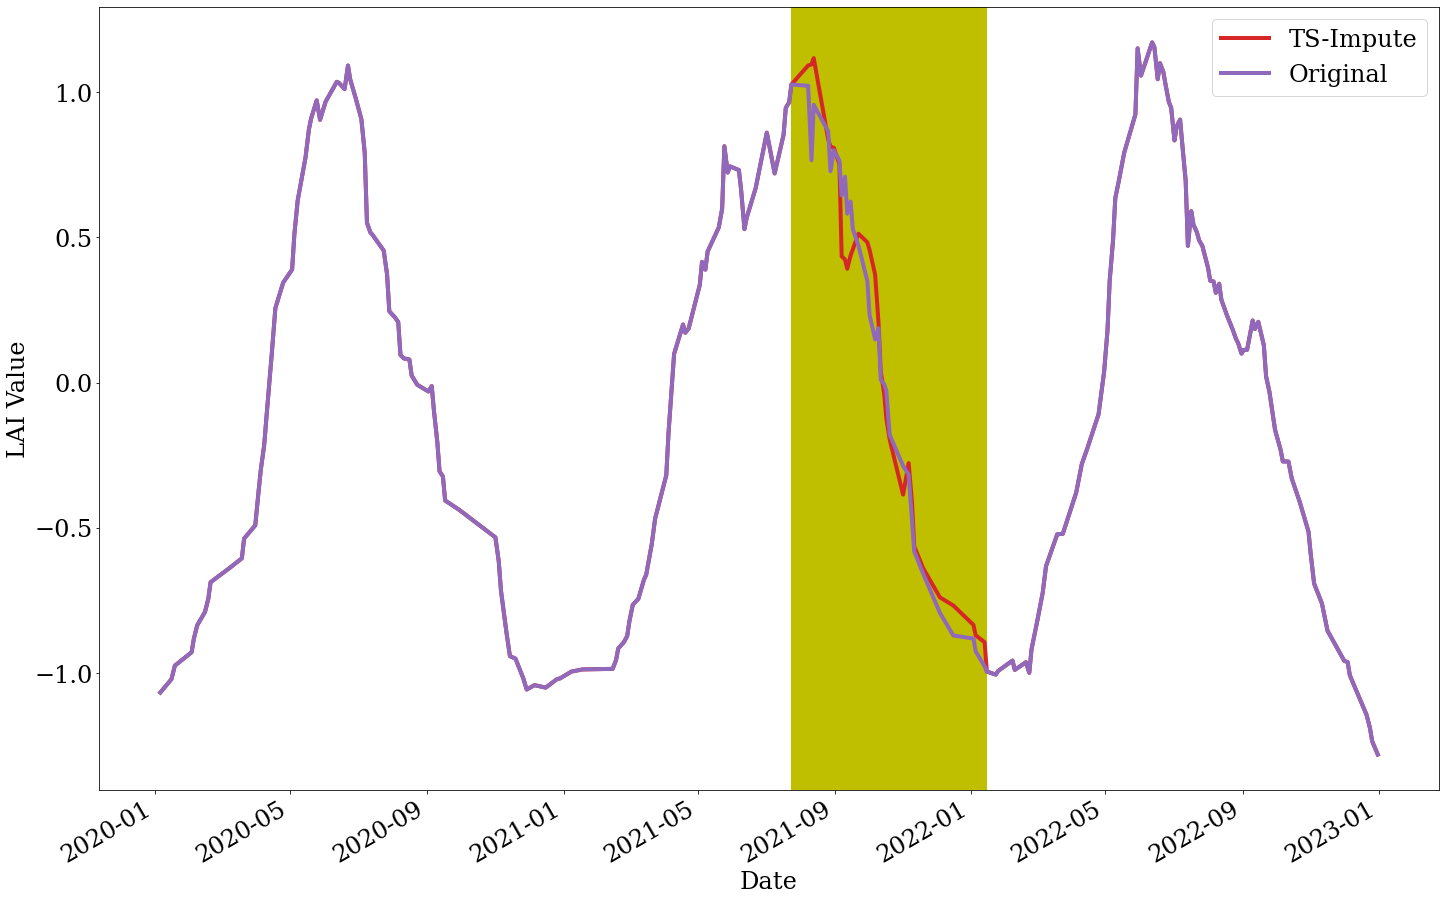

In [33]:
data_all = data.T
data_all.drop(data_all.tail(1).index,inplace=True)
create_plot(pixel, x, data_all, data_gaps)